# Modeling Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

In [1]:
import sys

sys.path.append('/Users/nickolaspedrimiranda/CodeUp/Regression-Project/')

In [2]:
import pandas as pd
import numpy as np
from pydataset import data

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import acquire as ac
import prepare as prep
import evaluate as ev

## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [3]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
rename = {'Sepal.Length':'sep_len',
          'Sepal.Width':'sep_wid',
          'Petal.Length':'pet_len',
          'Petal.Width':'pet_wid',
          'Species':'species'}

iris = iris.rename(columns=rename)

In [6]:
iris.head()

,sep_len,sep_wid,pet_len,pet_wid,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### a. Choose features other than the ones used in the lesson.

In [7]:
X = iris[['pet_len', 'pet_wid']]

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

m1_pred = kmeans.predict(X)

In [8]:
iris['m1_cluster'] = m1_pred.astype(str)

### b. Visualize the results of your clustering.

<Axes: xlabel='pet_len', ylabel='pet_wid'>

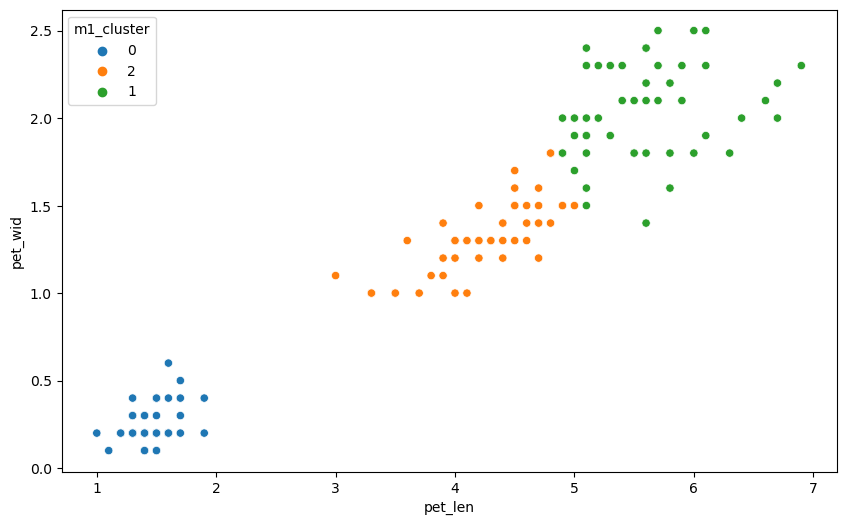

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(iris, x='pet_len', y='pet_wid', hue='m1_cluster')

### c. Use the elbow method to visually select a good value for k.

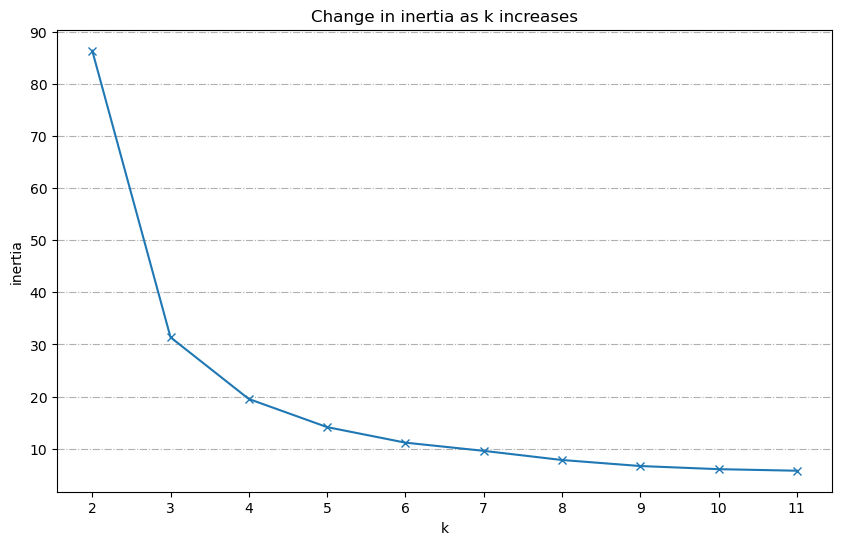

In [10]:
plt.figure(figsize=(10, 6))
pd.Series({k: KMeans(k, n_init='auto', random_state=100).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid(linestyle='-.', axis='y')
plt.title('Change in inertia as k increases')
plt.show()

### d. Repeat the clustering, this time with 3 different features.

In [11]:
X2 = iris[['pet_len', 'pet_wid','sep_len']]

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X2)

m2_pred = kmeans.predict(X2)

In [12]:
iris['m2_cluster'] = m2_pred.astype(str)

<Axes: xlabel='pet_len', ylabel='pet_wid'>

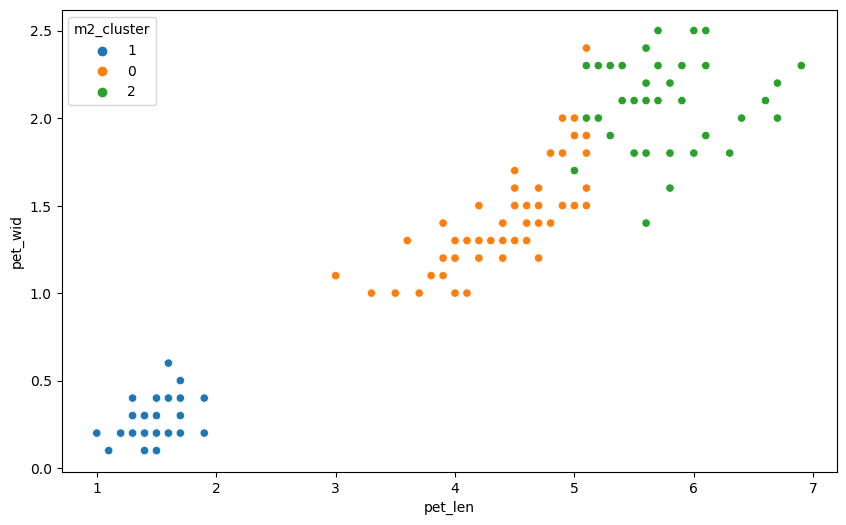

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(iris, x='pet_len', y='pet_wid', hue='m2_cluster')

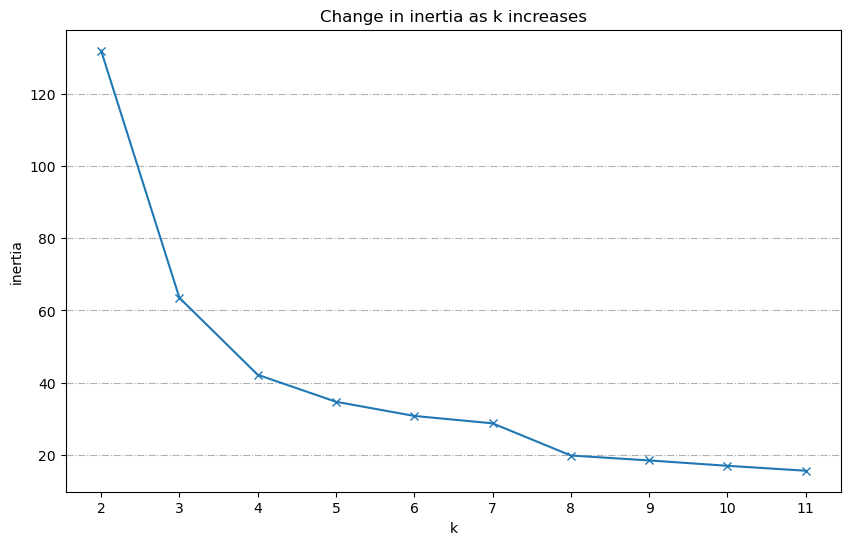

In [14]:
plt.figure(figsize=(10, 6))
pd.Series({k: KMeans(k, n_init='auto', random_state=100).fit(X2).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid(linestyle='-.', axis='y')
plt.title('Change in inertia as k increases')
plt.show()

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

### Pre-processing

In [15]:
query = ''' SELECT * FROM customers'''
mall = ac.sql_query('mall_customers', query)

In [16]:
mall.head(3)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [17]:
mall = mall.drop(columns=['customer_id'])

In [18]:
scaled_mall = prep.scale(mall, scaled_cols=['annual_income','age','spending_score'], split=False)

In [19]:
mall.head(3)

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [20]:
scaled_mall.head(3)

,gender,age,annual_income,spending_score
0,Male,0.019231,0.000000,0.387755
1,Male,0.057692,0.000000,0.816327
2,Female,0.038462,0.008197,0.051020


### Mini Exploration

<Axes: xlabel='gender', ylabel='spending_score'>

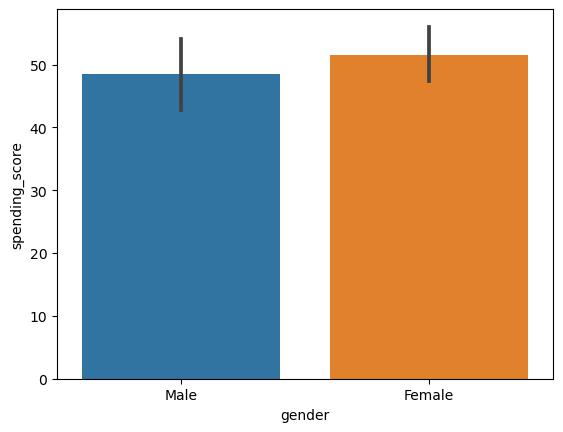

In [21]:
sns.barplot(mall, x='gender', y='spending_score')

<Axes: xlabel='age', ylabel='spending_score'>

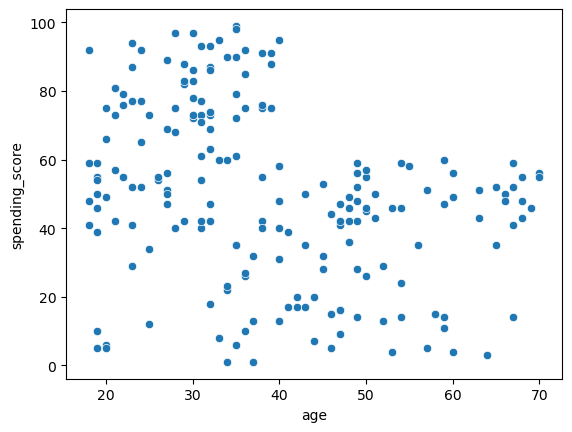

In [22]:
sns.scatterplot(mall, x='age', y='spending_score')

<Axes: xlabel='annual_income', ylabel='spending_score'>

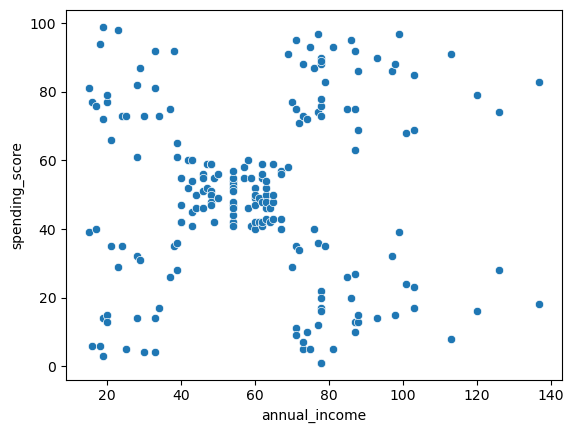

In [23]:
sns.scatterplot(mall, x='annual_income', y='spending_score')

### Modeling

In [24]:
mall = pd.get_dummies(mall, columns=['gender'], drop_first=True)
scaled_mall = pd.get_dummies(scaled_mall, columns=['gender'], drop_first=True)

In [25]:
mall_res = mall.copy()

In [34]:
X = mall[['spending_score','annual_income']]

kmeans = KMeans(n_clusters=5, n_init='auto', random_state=100)
kmeans.fit(X)

m1_pred = kmeans.predict(X)

mall_res['model_1'] = m1_pred.astype(str)

<Axes: xlabel='annual_income', ylabel='spending_score'>

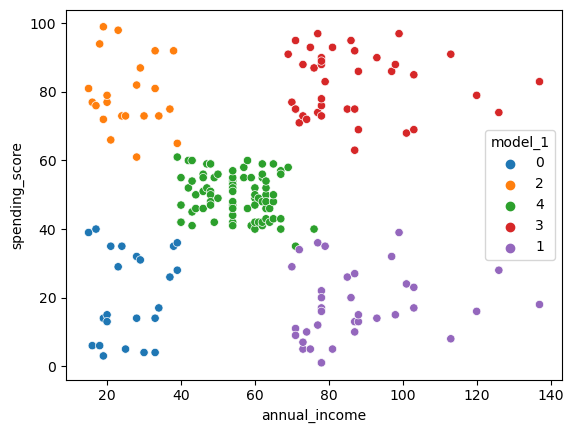

In [35]:
sns.scatterplot(mall_res, x='annual_income', y='spending_score', hue='model_1')

In [31]:
mall.head()

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [28]:
mall_res_scaled = scaled_mall.copy()

In [32]:
X2 = scaled_mall[['annual_income','spending_score']]

kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(X2)

m2_pred = kmeans.predict(X2)

mall_res_scaled['model_2'] = m2_pred.astype(str)

<Axes: xlabel='annual_income', ylabel='spending_score'>

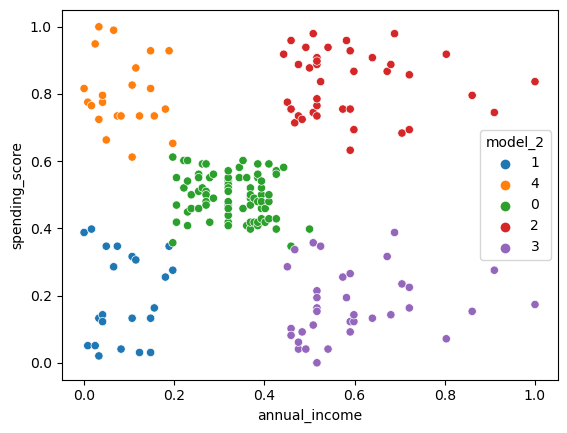

In [33]:
sns.scatterplot(mall_res_scaled, x='annual_income', y='spending_score', hue='model_2')

Scaled model performed horrible when using all data including gender and age. When using only spending score, and annual_income it looks almost identical to non_scaled

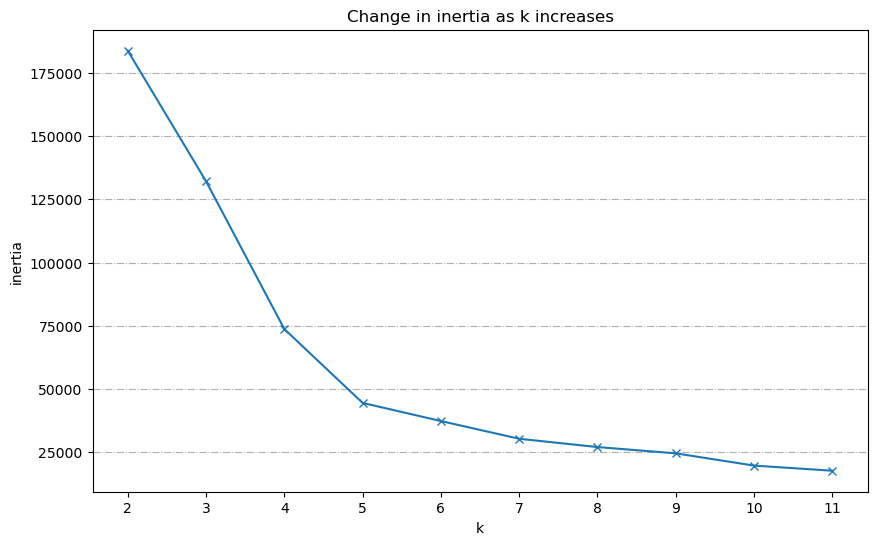

In [40]:
plt.figure(figsize=(10, 6))
pd.Series({k: KMeans(k, n_init='auto', random_state=100).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid(linestyle='-.', axis='y')
plt.title('Change in inertia as k increases')
plt.show()

<Axes: xlabel='age', ylabel='annual_income'>

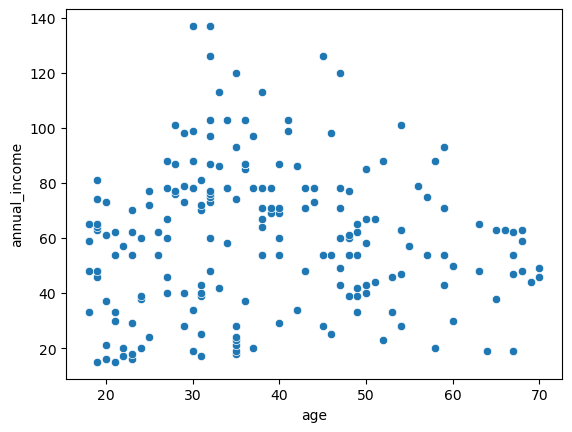

In [41]:
sns.scatterplot(mall, x='age', y='annual_income')